In [74]:
import pandas as pd          
import numpy as np            
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings

# Suppress font-related warnings
warnings.filterwarnings('ignore', category=UserWarning, message='.*Glyph.*missing from font.*')
warnings.filterwarnings('ignore', category=UserWarning, message='.*missing from font.*')

# Additional suppression for matplotlib warnings
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 0  

In [75]:
df=pd.read_csv('twitchdata-update.csv')

In [76]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [78]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


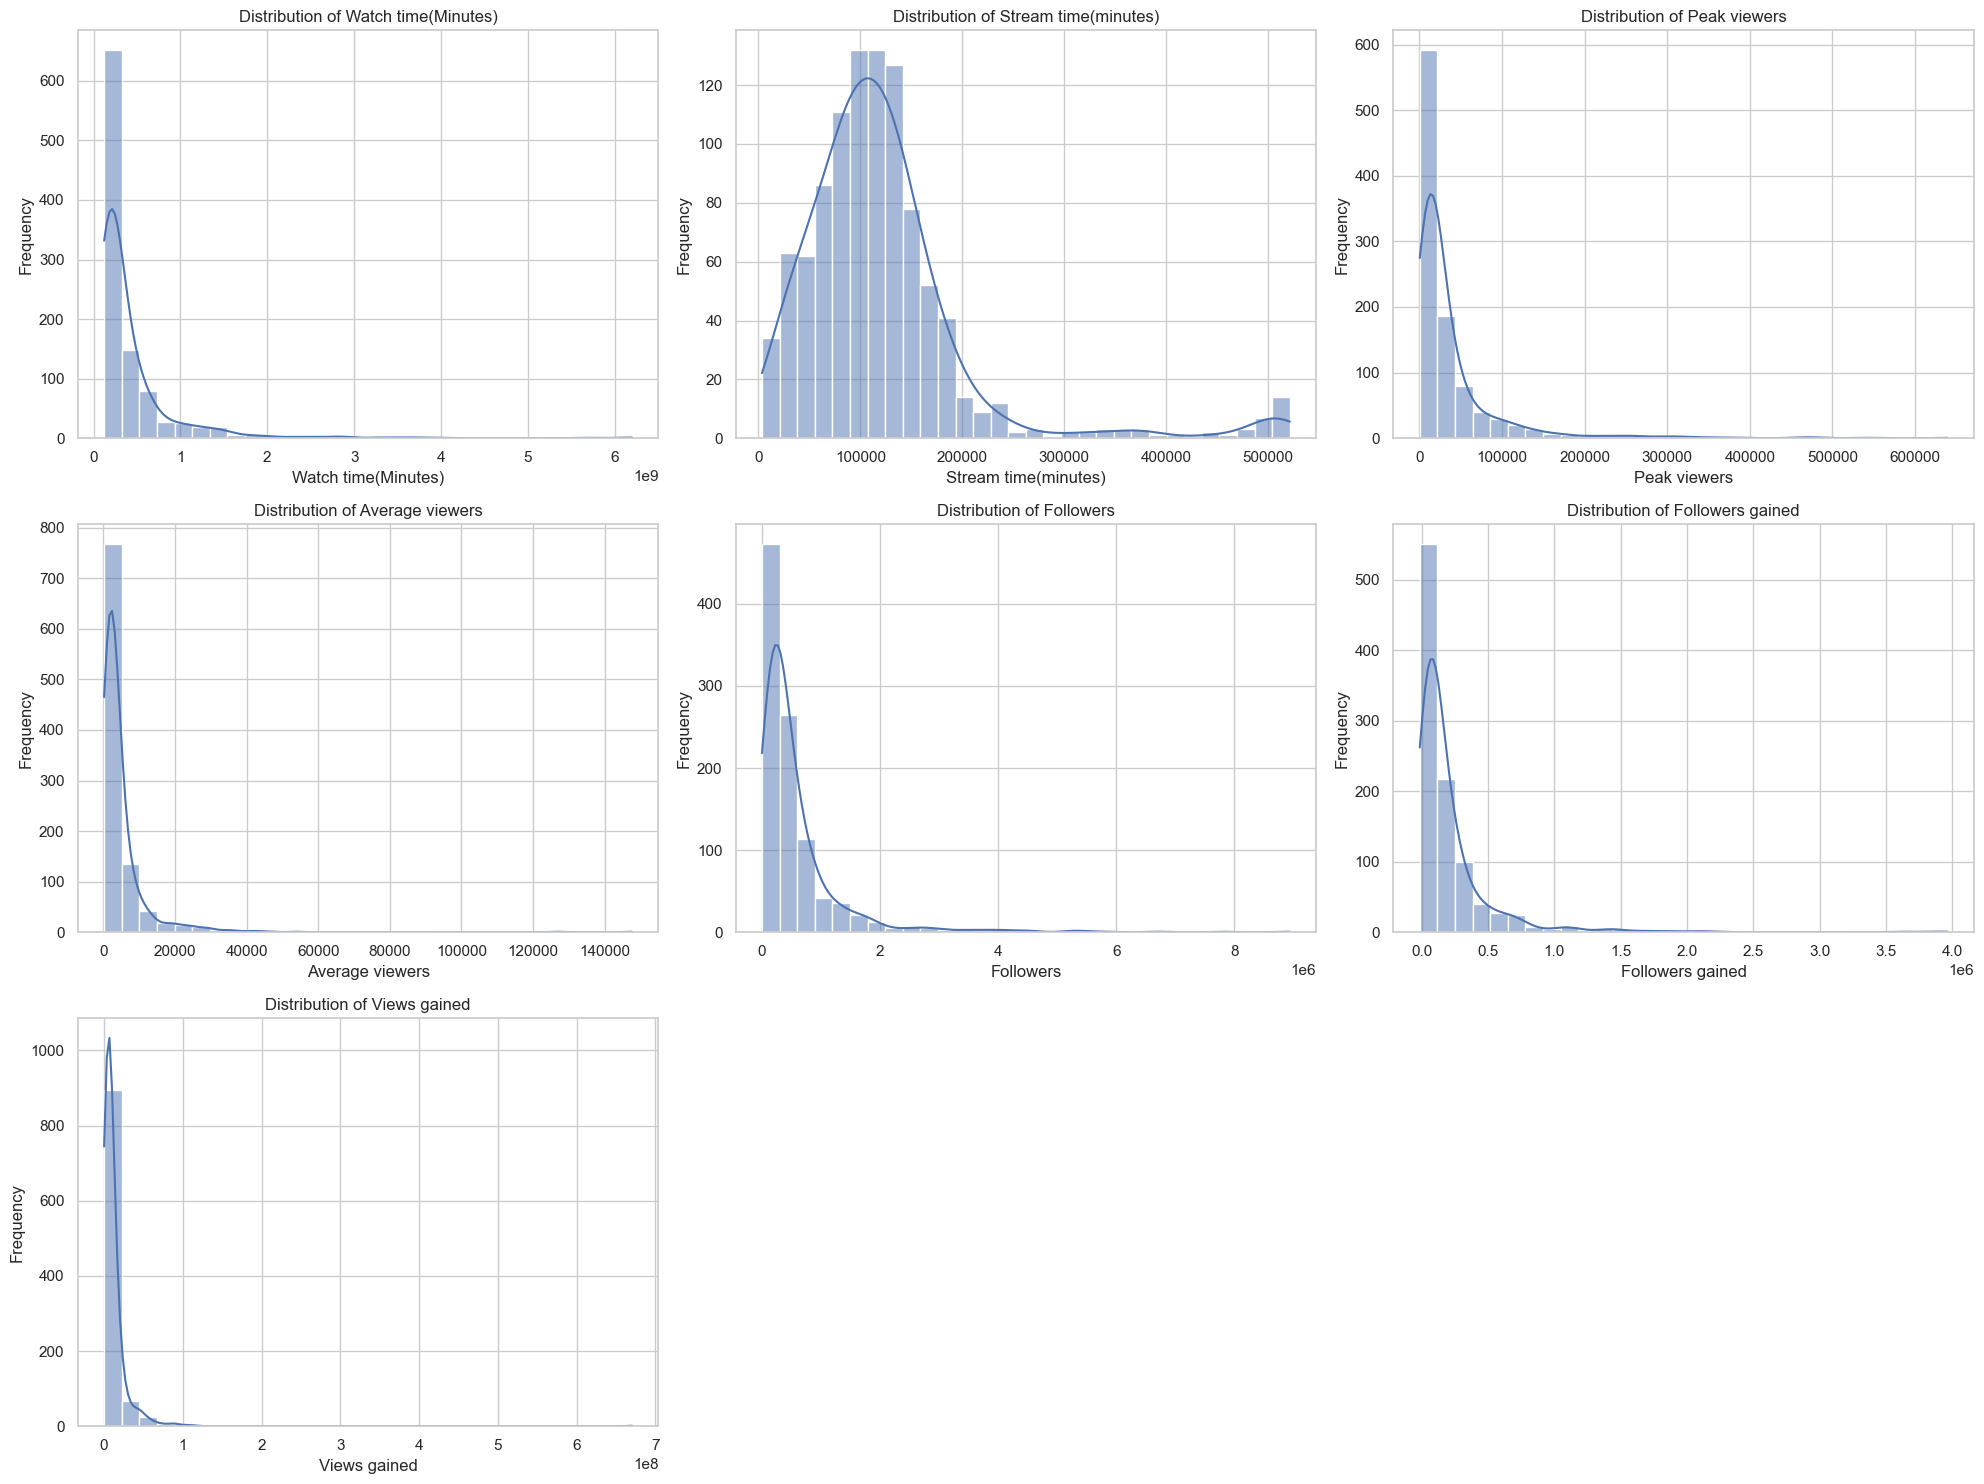

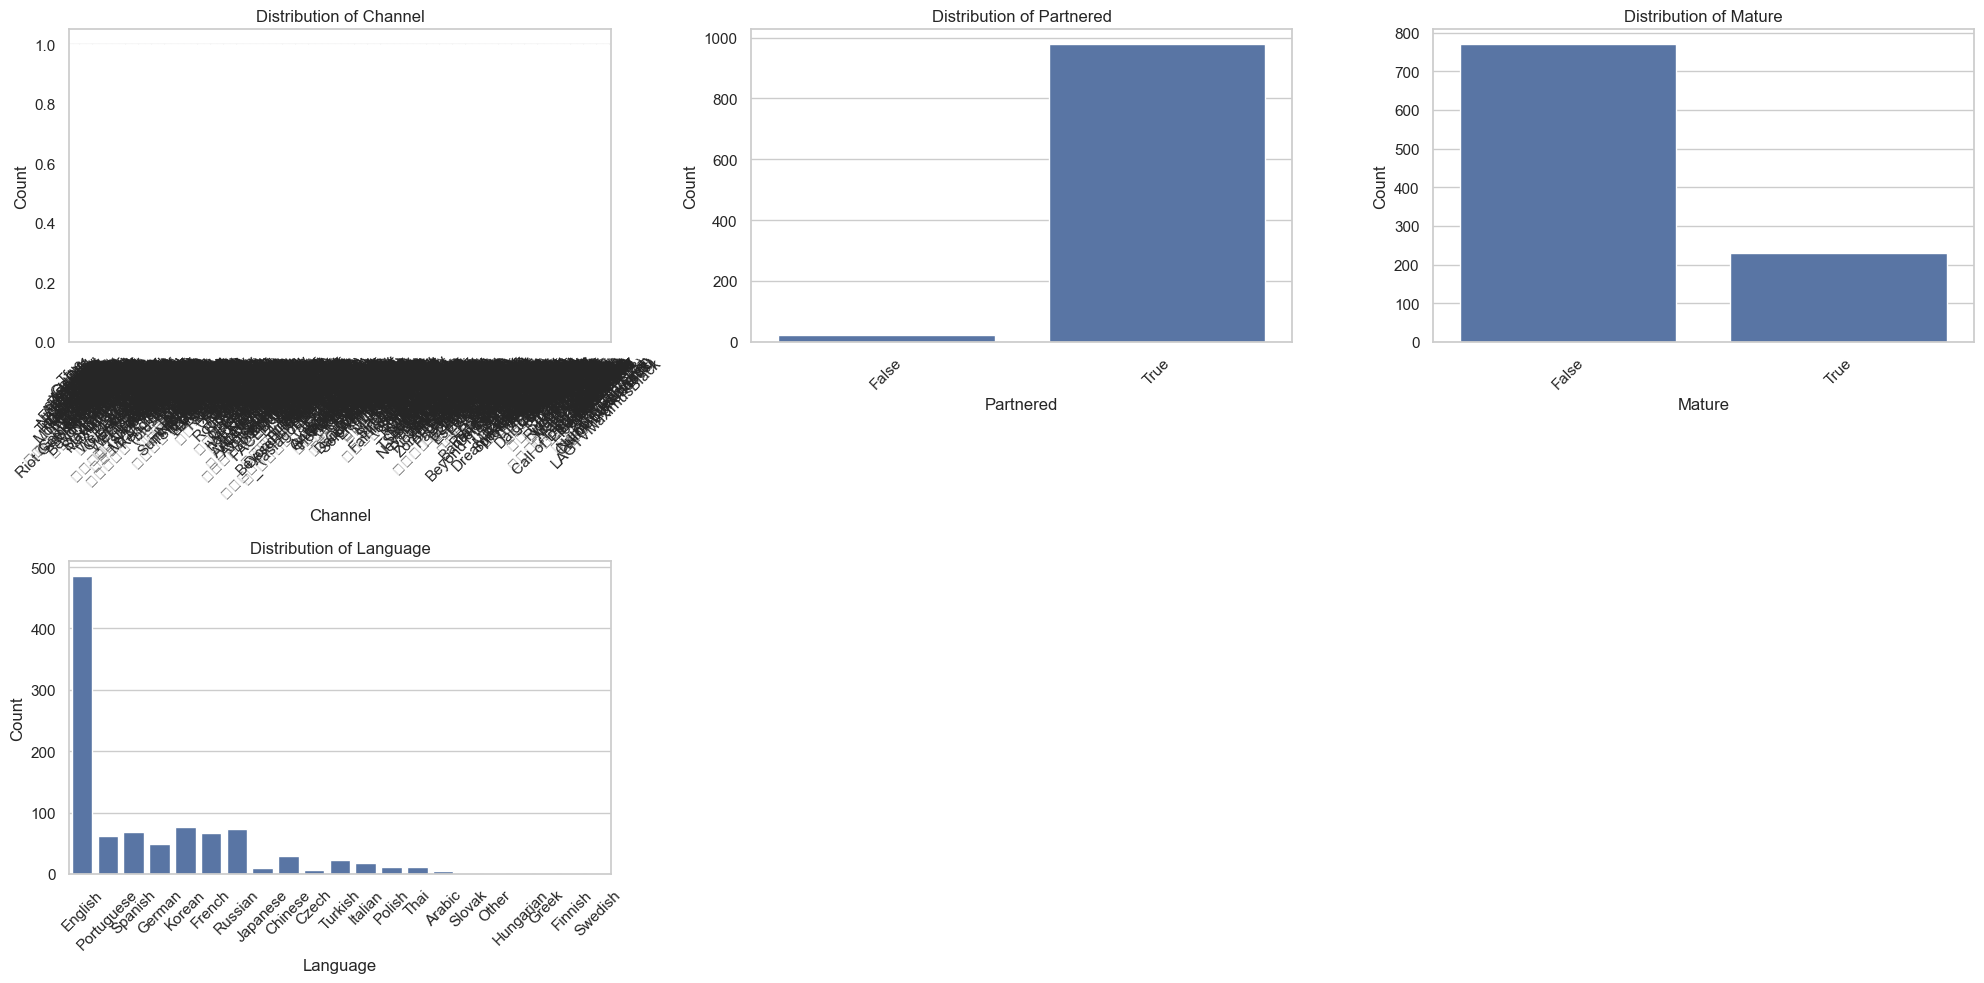

In [79]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# 
# 1. Numeric variables → Histograms

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(int(np.ceil(len(numeric_cols)/3)), 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 2. Categorical variables → Bar charts

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(int(np.ceil(len(categorical_cols)/3)), 3, i)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
for col in numeric_cols:
    data = df[col]
    
    col_min = data.min()
    col_max = data.max()
    col_mean = data.mean()
    col_median = data.median()
    col_std = data.std()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = outliers.count()
    outlier_pct = (outlier_count / len(data)) * 100

    print(f"{col}")
    print(f"Min: {col_min}")
    print(f"Max: {col_max}")
    print(f"Mean: {col_mean}")
    print(f"Median: {col_median}")
    print(f"Std Dev: {col_std}")
    print(f"Outliers: {outlier_count} ({outlier_pct:.2f}%)\n")

Watch time(Minutes)
Min: 122192850
Max: 6196161750
Mean: 418427930.13
Median: 234990787.5
Std Dev: 549635514.0833039
Outliers: 107 (10.70%)

Stream time(minutes)
Min: 3465
Max: 521445
Mean: 120515.16
Median: 108240.0
Std Dev: 85376.20136421964
Outliers: 48 (4.80%)

Peak viewers
Min: 496
Max: 639375
Mean: 37065.051
Median: 16676.0
Std Dev: 60314.307686054504
Outliers: 113 (11.30%)

Average viewers
Min: 235
Max: 147643
Mean: 4781.04
Median: 2425.0
Std Dev: 8453.68496466966
Outliers: 100 (10.00%)

Followers
Min: 3660
Max: 8938903
Mean: 570054.068
Median: 318063.0
Std Dev: 804413.3676527536
Outliers: 89 (8.90%)

Followers gained
Min: -15772
Max: 3966525
Mean: 205518.534
Median: 98352.0
Std Dev: 339913.71295790625
Outliers: 90 (9.00%)

Views gained
Min: 175788
Max: 670137548
Mean: 11668165.613
Median: 6456323.5
Std Dev: 24905722.446600918
Outliers: 91 (9.10%)



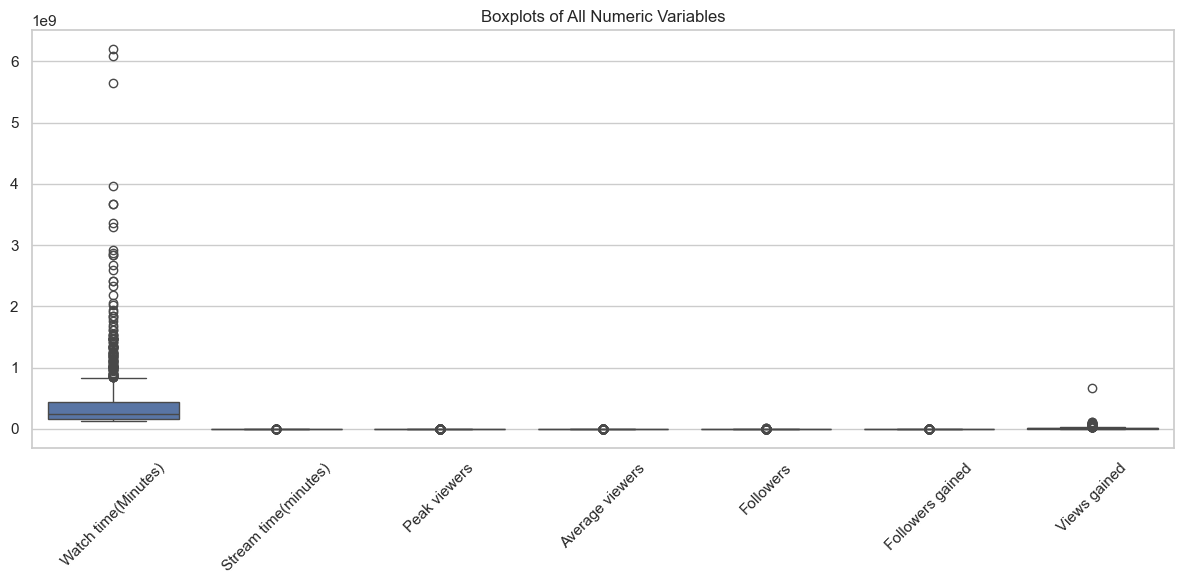

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of All Numeric Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numeric_cols:
    outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])][col]
    print(f"{col} outliers:")
    print(outliers)
    print("\n")

Watch time(Minutes) outliers:
0      6196161750
1      6091677300
2      5644590915
3      3970318140
4      3671000070
          ...    
102     853324635
103     853049385
104     850636305
105     849083325
106     842581305
Name: Watch time(Minutes), Length: 107, dtype: int64


Stream time(minutes) outliers:
2      515280
3      517740
30     486510
34     496950
49     505080
60     381735
75     314595
91     253395
107    460065
120    325935
131    487005
142    443130
145    446655
158    498765
165    344055
172    267465
181    273660
227    251250
232    508965
242    499575
250    301395
264    244560
283    362970
306    518415
308    336690
342    400770
392    521445
397    508140
415    339000
417    513540
433    517260
456    484455
469    517980
497    364425
500    278745
578    486000
605    496545
641    500010
651    379680
657    307005
698    365670
746    519675
758    514845
828    499215
890    509670
936    383955
983    373800
992    521430
Name: Stream t

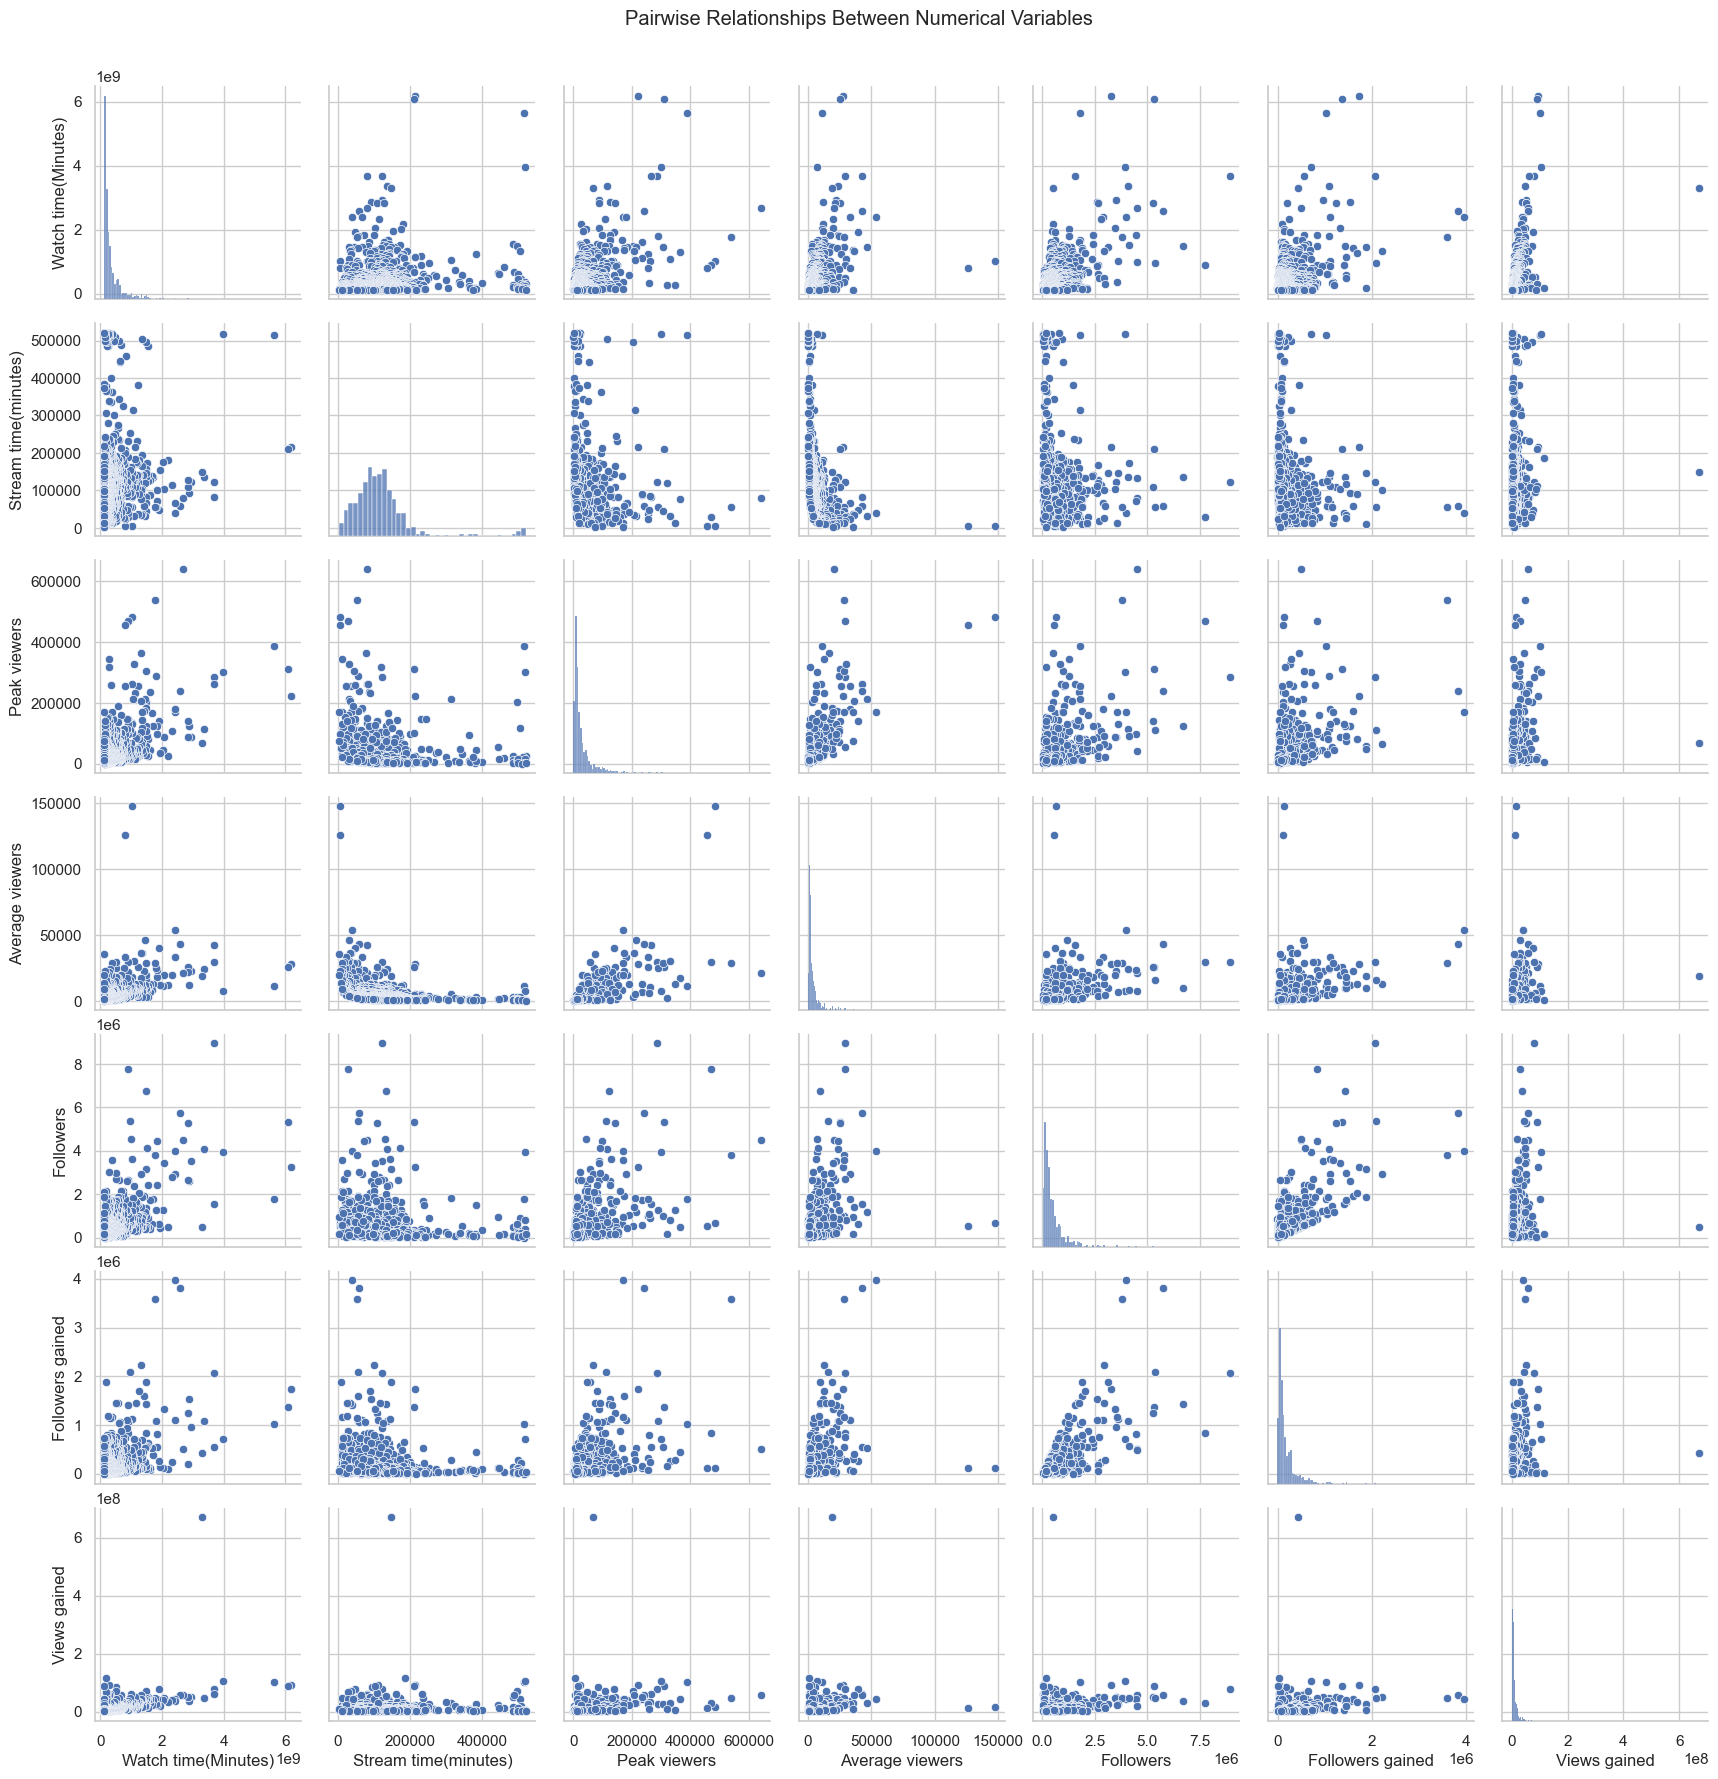

In [83]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02)
plt.show()